In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [5]:
data = pd.read_csv('vgsales.csv') 
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.shape

(16598, 11)

In [8]:
genre = 'Sports'
yr = 2000
data_ = data.query('Genre == @genre and Year > @yr')
data_.shape

(1896, 11)

In [9]:
genre_sales = data.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


What was the distribution of sales for each genre, across regions, and globally?

<Figure size 1500x900 with 0 Axes>

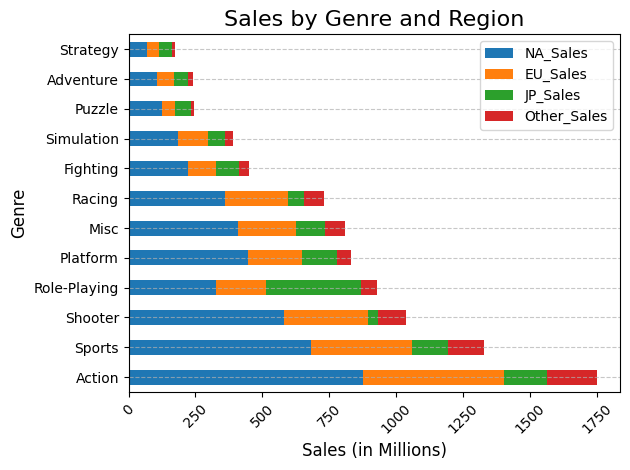

In [10]:
 #Sort by total global sales for better visualization
genre_sales["Total_Sales"] = genre_sales.sum(axis=1)
genre_sales = genre_sales.sort_values("Total_Sales", ascending=False)
genre_sales.drop(columns=["Total_Sales"], inplace = True)  # Remove extra column

# Visualization
plt.figure(figsize=(15, 9))
genre_sales.plot(kind = 'barh', stacked = True)
plt.title("Sales by Genre and Region", fontsize=16)
plt.ylabel("Genre", fontsize=12)
plt.xlabel("Sales (in Millions)", fontsize=12)
plt.xticks(rotation=45, ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:

data_filtered = data[data['Global_Sales'] > 10] # only selecting games with global sales greater than 10 Millions

publisher_sales = data_filtered.groupby('Publisher')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
publisher_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Activision,69.46,44.21,2.78,15.59
Microsoft Game Studios,22.94,7.77,0.37,2.88
Nintendo,382.13,215.81,143.61,51.50
Sony Computer Entertainment,16.84,13.85,6.32,11.33
Take-Two Interactive,56.79,37.65,3.15,23.84
Ubisoft,6.05,3.15,0.00,1.07


<Figure size 1500x900 with 0 Axes>

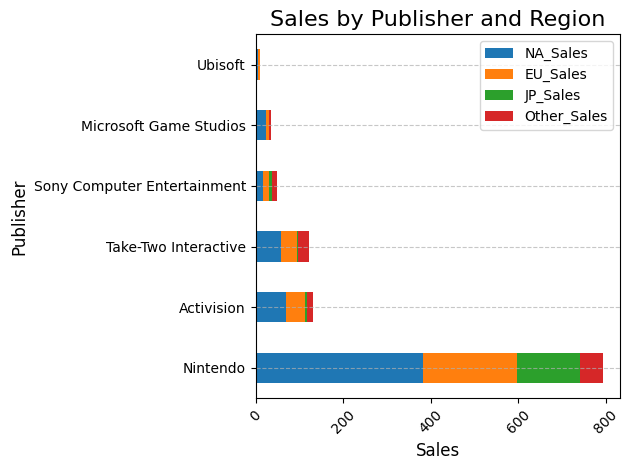

In [12]:
# #Sort by total global sales for better visualization
publisher_sales["Total_Sales"] = publisher_sales.sum(axis=1)
publisher_sales = publisher_sales.sort_values("Total_Sales", ascending=False)
publisher_sales.drop(columns=["Total_Sales"], inplace = True)  # Remove extra column

# Visualization
plt.figure(figsize=(15, 9))
publisher_sales.plot(kind = 'barh', stacked = True)
plt.title("Sales by Publisher and Region", fontsize=16)
plt.ylabel("Publisher", fontsize=12)
plt.xlabel("Sales", fontsize=12)
plt.xticks(rotation=45, ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [53]:
platform_sales = data.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
platform_sales['Total_Sales'] = platform_sales.sum(axis=1)
platform_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,96.98
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.37
DC,5.43,1.69,8.56,0.27,15.95
DS,390.71,194.65,175.57,60.53,821.46
GB,114.32,47.82,85.12,8.20,255.46
GBA,187.54,75.25,47.33,7.73,317.85
GC,133.46,38.71,21.58,5.18,198.93
GEN,19.27,5.52,2.67,0.89,28.35


In [54]:
platform_sales_ = platform_sales[platform_sales['Total_Sales'] > 100.0]
platform_sales_

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
3DS,78.87,58.52,97.35,12.63,247.37
DS,390.71,194.65,175.57,60.53,821.46
GB,114.32,47.82,85.12,8.20,255.46
GBA,187.54,75.25,47.33,7.73,317.85
GC,133.46,38.71,21.58,5.18,198.93
N64,139.02,41.06,34.22,4.38,218.68
NES,125.94,21.15,98.65,5.31,251.05
PC,93.28,139.68,0.17,24.86,257.99
PS,336.51,213.60,139.82,40.91,730.84


In [55]:
platform_sales_ = platform_sales_.sort_values("Total_Sales", ascending=False)
platform_sales_.drop(columns=["Total_Sales"], inplace = True)  # Remove extra column
platform_sales_



,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PS2,583.84,339.29,139.20,193.44
X360,601.05,280.58,12.43,85.54
PS3,392.26,343.71,79.99,141.93
Wii,507.71,268.38,69.35,80.61
DS,390.71,194.65,175.57,60.53
PS,336.51,213.60,139.82,40.91
GBA,187.54,75.25,47.33,7.73
PSP,108.99,68.25,76.79,42.19
PS4,96.80,123.70,14.30,43.36


<Figure size 1500x900 with 0 Axes>

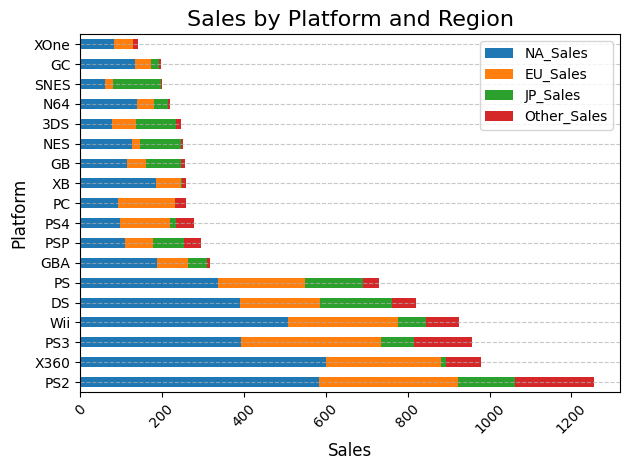

In [56]:
# Visualization
plt.figure(figsize=(15, 9))
platform_sales_.plot(kind = 'barh', stacked = True)
plt.title("Sales by Platform and Region", fontsize=16)
plt.ylabel("Platform", fontsize=12)
plt.xlabel("Sales", fontsize=12)
plt.xticks(rotation=45, ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Change in video game sales with time

In [49]:
start_year = 1980
end_year = 2030
data_year = data.query('Year >= @start_year and Year < @end_year').copy()
yearly_sales = data_year.groupby('Year')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
yearly_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


In [50]:
yearly_sales["Total_Sales"] = yearly_sales.sum(axis=1)
yearly_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.68
1982.0,26.92,1.65,0.00,0.31,28.88
1983.0,7.76,0.80,8.10,0.14,16.80
1984.0,33.28,2.10,14.27,0.70,50.35
1985.0,33.73,4.74,14.56,0.92,53.95
1986.0,12.50,2.84,19.81,1.93,37.08
1987.0,8.46,1.41,11.63,0.20,21.70
1988.0,23.87,6.59,15.76,0.99,47.21


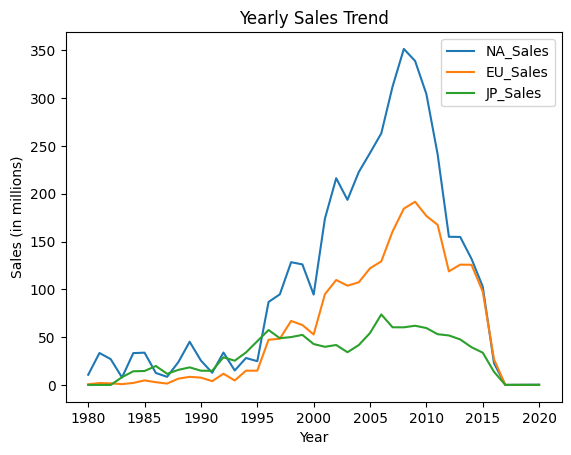

In [51]:
ax = yearly_sales.plot(kind='line', y=['NA_Sales', 'EU_Sales', 'JP_Sales'])

ax.set_xlabel('Year')
ax.set_ylabel('Sales (in millions)')
ax.set_title("Yearly Sales Trend")

plt.show()


In [63]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [66]:
start_year = 1980
end_year = 2010
data_year = data.query('Year >= @start_year and Year < @end_year').copy()
genre_yearly_sales = data_year.groupby(['Genre', 'Year'])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

genre_yearly_sales


NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre    Year                                             
Action   1980.0      0.32      0.02      0.00         0.00
         1981.0     13.86      0.81      0.00         0.12
         1982.0      6.07      0.38      0.00         0.05
         1983.0      2.67      0.17      0.00         0.02
         1984.0      0.80      0.19      0.83         0.03
...                   ...       ...       ...          ...
Strategy 2005.0      2.46      1.13      1.38         0.37
         2006.0      2.07      1.08      0.51         0.57
         2007.0      3.81      1.87      2.87         0.85
         2008.0      4.84      4.18      1.73         0.95
         2009.0      4.62      4.93      1.82         1.14

[303 rows x 4 columns]

<Axes: xlabel='Year'>

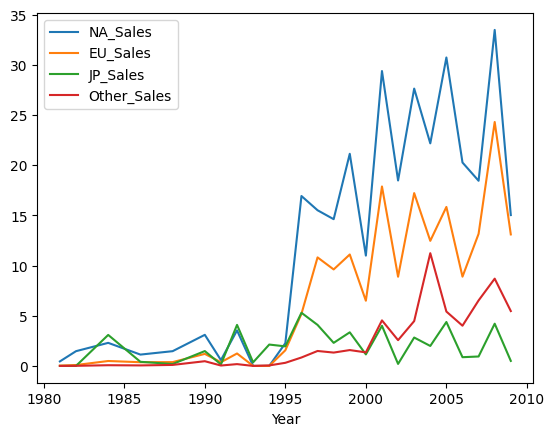

In [68]:
genre_yearly_sales.loc['Racing'].plot(kind='line', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])